In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv_path = 'mvp_votings.csv'

t_label = ["year"]
x_labels = ["var%d" % i for i in range(1, 91)]

data_frame = pd.read_csv(csv_path)


In [3]:
data_frame.head()

,Unnamed: 0,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,season,player,...,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48
0,0,18.6,0.2,6.5,25.1,0.572,28.4,7.5,1980-81,Julius Erving,...,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231
1,1,18.3,0.9,4.0,19.9,0.528,24.3,4.3,1980-81,Larry Bird,...,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160
2,2,18.2,0.0,6.9,25.5,0.616,26.3,6.1,1980-81,Kareem Abdul-Jabbar,...,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230
3,3,19.3,0.0,10.1,25.1,0.585,27.6,3.3,1980-81,Moses Malone,...,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202
4,4,21.1,0.4,7.6,22.9,0.555,32.3,2.9,1980-81,George Gervin,...,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182


In [4]:

orig_features = ['fga', 'fg3a', 'fta', 'per', 'ts_pct', 'usg_pct', 'bpm',
       'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g',
       'stl_per_g', 'blk_per_g', 'fg_pct', 'fg3_pct', 'ft_pct', 'ws',
       'ws_per_48', 'win_pct']

data = data_frame[orig_features + ["award_share"]]


In [5]:
data.head()

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,win_pct,award_share
0,18.6,0.2,6.5,25.1,0.572,28.4,7.5,35.0,24.6,8.0,4.4,2.1,1.8,0.521,0.222,0.787,13.8,0.231,0.756098,0.658
1,18.3,0.9,4.0,19.9,0.528,24.3,4.3,39.5,21.2,10.9,5.5,2.0,0.8,0.478,0.270,0.863,10.8,0.160,0.756098,0.613
2,18.2,0.0,6.9,25.5,0.616,26.3,6.1,37.2,26.2,10.3,3.4,0.7,2.9,0.574,0.000,0.766,14.3,0.230,0.658537,0.414
3,19.3,0.0,10.1,25.1,0.585,27.6,3.3,40.6,27.8,14.8,1.8,1.0,1.9,0.522,0.333,0.757,13.7,0.202,0.487805,0.261
4,21.1,0.4,7.6,22.9,0.555,32.3,2.9,33.7,27.1,5.1,3.2,1.1,0.7,0.492,0.257,0.826,10.5,0.182,0.634146,0.120


In [6]:
# corrMatrix = data.corr()

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,fga,fg3a,fta,per,ts_pct,usg_pct,bpm,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,fg_pct,fg3_pct,ft_pct,ws,ws_per_48,win_pct,award_share
fga,1,0.283328,0.552479,0.495785,-0.146594,0.879704,0.292352,0.536697,0.917315,-0.0282279,-0.057915,0.189015,-0.0651988,-0.219627,0.182758,0.167132,0.263769,0.127464,-0.187543,0.322611
fg3a,0.283328,1,0.00963556,0.193161,0.096786,0.31428,0.32912,0.15063,0.270153,-0.394795,0.33198,0.239799,-0.416399,-0.537366,0.558935,0.438201,0.151814,0.158144,0.0288329,0.12734
fta,0.552479,0.00963556,1,0.637578,0.27983,0.671235,0.368387,0.418457,0.762,0.292931,-0.194524,-0.0259563,0.209044,0.173575,-0.0648977,-0.104021,0.465922,0.429424,-0.133067,0.361956
per,0.495785,0.193161,0.637578,1,0.474341,0.648964,0.85082,0.227933,0.695042,0.249545,0.0797371,0.150815,0.228022,0.281989,0.113619,0.0836542,0.755553,0.848766,0.150267,0.596441
ts_pct,-0.146594,0.096786,0.27983,0.474341,1,-0.00911207,0.410952,-0.115167,0.214352,0.0709809,0.00855075,-0.153192,0.0389611,0.67187,0.0810786,0.24312,0.553654,0.644765,0.224391,0.246134
usg_pct,0.879704,0.31428,0.671235,0.648964,-0.00911207,1,0.386993,0.277681,0.880354,-0.0279052,-0.0720194,0.0511608,-0.0187059,-0.161638,0.193199,0.134414,0.272843,0.273593,-0.0849221,0.360154
bpm,0.292352,0.32912,0.368387,0.85082,0.410952,0.386993,1,0.214109,0.448973,0.0772753,0.352083,0.411213,0.104096,0.118514,0.226815,0.182812,0.776477,0.858732,0.253401,0.598433
mp_per_g,0.536697,0.15063,0.418457,0.227933,-0.115167,0.277681,0.214109,1,0.50917,0.180999,0.12262,0.309939,-0.000917519,-0.148928,0.11992,-0.03241,0.36702,0.0775658,-0.227771,0.232764
pts_per_g,0.917315,0.270153,0.762,0.695042,0.214352,0.880354,0.448973,0.50917,1,0.06996,-0.097615,0.108234,0.013362,0.0402717,0.156696,0.180179,0.489733,0.390867,-0.118971,0.432719
trb_per_g,-0.0282279,-0.394795,0.292931,0.249545,0.0709809,-0.0279052,0.0772753,0.180999,0.06996,1,-0.529854,-0.287022,0.6718,0.415764,-0.410472,-0.507207,0.223954,0.2119,-0.0165052,0.183031


In [7]:
'''
Looking at the correlation matrix for the original features above the features that are highly
correlated are:
    - bpm and per 
    - pts_per_g and fga
    - per and ws_per_48
    - ws_per_48 and bpm
    - pts_per_g and usg (usage %)

True shooting % represenets all other shooting percentages, so we don't need those. 
And remove bpm for per, and ws_per_48 for ws as these momdel similar stat.

'''

"\nLooking at the correlation matrix for the original features above the features that are highly\ncorrelated are:\n    - bpm and per \n    - pts_per_g and fga\n    - per and ws_per_48\n    - ws_per_48 and bpm\n    - pts_per_g and usg (usage %)\n\nTrue shooting % represenets all other shooting percentages, so we don't need those. \nAnd remove bpm for per, and ws_per_48 for ws as these momdel similar stat.\n\n"

In [8]:
features = ['ts_pct', 'per', 'mp_per_g', 'pts_per_g', 'trb_per_g', 'ast_per_g',
            'stl_per_g', 'blk_per_g', 'ws', 'win_pct']

newdata = data_frame[features + ["award_share"]]

rs = np.random.RandomState(0)
df = pd.DataFrame(rs.rand(10, 10))
corr = newdata.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None)

,ts_pct,per,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,ws,win_pct,award_share
ts_pct,1,0.474341,-0.115167,0.214352,0.0709809,0.00855075,-0.153192,0.0389611,0.553654,0.224391,0.246134
per,0.474341,1,0.227933,0.695042,0.249545,0.0797371,0.150815,0.228022,0.755553,0.150267,0.596441
mp_per_g,-0.115167,0.227933,1,0.50917,0.180999,0.12262,0.309939,-0.000917519,0.36702,-0.227771,0.232764
pts_per_g,0.214352,0.695042,0.50917,1,0.06996,-0.097615,0.108234,0.013362,0.489733,-0.118971,0.432719
trb_per_g,0.0709809,0.249545,0.180999,0.06996,1,-0.529854,-0.287022,0.6718,0.223954,-0.0165052,0.183031
ast_per_g,0.00855075,0.0797371,0.12262,-0.097615,-0.529854,1,0.545504,-0.516329,0.117961,0.0869451,0.128249
stl_per_g,-0.153192,0.150815,0.309939,0.108234,-0.287022,0.545504,1,-0.258731,0.202884,-0.0426431,0.138098
blk_per_g,0.0389611,0.228022,-0.000917519,0.013362,0.6718,-0.516329,-0.258731,1,0.156222,0.059239,0.137457
ws,0.553654,0.755553,0.36702,0.489733,0.223954,0.117961,0.202884,0.156222,1,0.301127,0.629657
win_pct,0.224391,0.150267,-0.227771,-0.118971,-0.0165052,0.0869451,-0.0426431,0.059239,0.301127,1,0.356163


In [9]:
# Above is the new correlation matrix using new features

# Using linear Regression

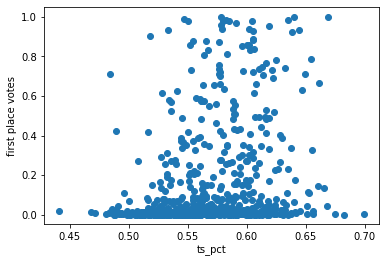

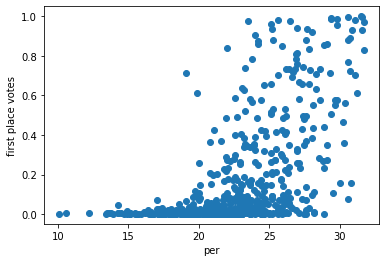

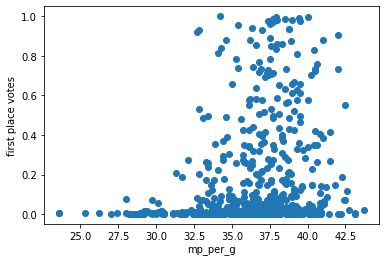

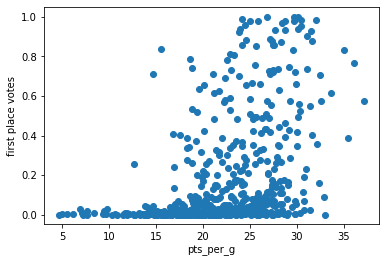

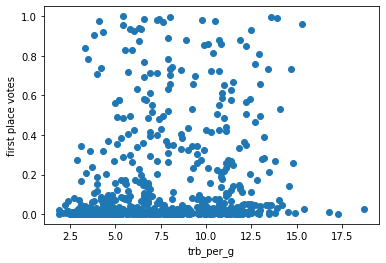

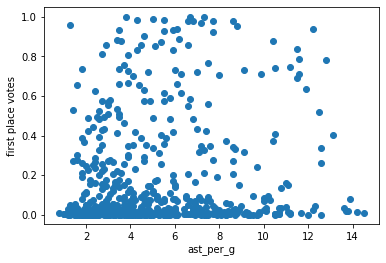

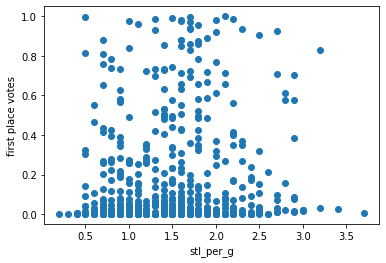

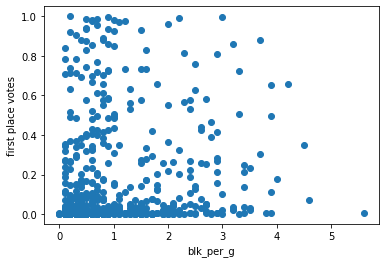

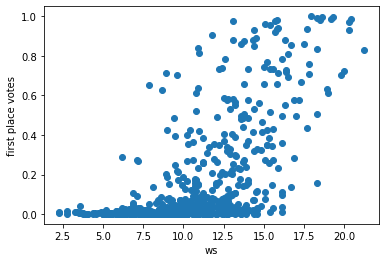

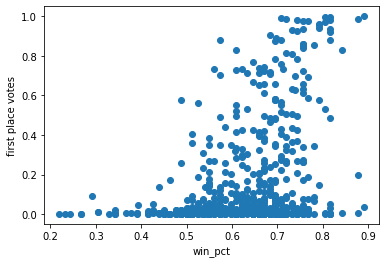

In [15]:
'''
plotting all the new features (x-axis) vs award share for mvp (y-axis)
'''

for f in range(len(newdata.columns)):
#     plt.subplot(f)
    if newdata.columns[f] != 'award_share':
        x = newdata[newdata.columns[f]]
        y = data_frame["award_share"]
        plt.xlabel(newdata.columns[f])
        plt.ylabel("first place votes");
        plt.plot(x, y, 'o');
        plt.show()




In [19]:
newdata.head()

,ts_pct,per,mp_per_g,pts_per_g,trb_per_g,ast_per_g,stl_per_g,blk_per_g,ws,win_pct,award_share
0,0.572,25.1,35.0,24.6,8.0,4.4,2.1,1.8,13.8,0.756098,0.658
1,0.528,19.9,39.5,21.2,10.9,5.5,2.0,0.8,10.8,0.756098,0.613
2,0.616,25.5,37.2,26.2,10.3,3.4,0.7,2.9,14.3,0.658537,0.414
3,0.585,25.1,40.6,27.8,14.8,1.8,1.0,1.9,13.7,0.487805,0.261
4,0.555,22.9,33.7,27.1,5.1,3.2,1.1,0.7,10.5,0.634146,0.120


In [20]:
'''
Regression task of given features to the award share
'''
newdata['award_share']

0      0.658
1      0.613
2      0.414
3      0.261
4      0.120
       ...  
644    0.025
645    0.013
646    0.008
647    0.001
648    0.001
Name: award_share, Length: 649, dtype: float64

In [ ]:
# X : Nx10 -- N = # data, 10 = $ of features
# L(y_i, t_i) = 1/2 * (y_i - t_i)^2 -- loss func
# y_i = X_i * W + b
# E(W, b) = 1/(2N) * SUM(L(y_i, t_i)) = 1/2N * (y_i - t_i)^2 -- Cost func

# VECTORIZED
# y = X*W + b
# E(W,b) = 1/2N * ||y-t||^2 = 1/2N * (y-t)^T * (y-t)

In [49]:
def cost_vectorized(y, t):
    '''
    Evaluate the cost function in a vectorized manner for 
    inputs `X` and targets `t`, at weights `w1`, `w2` and `b`.
    '''
    # TODO: write this!
    N = len(t)
    return np.sum((y - t)**2) / (2.0 * N)

In [41]:
def pred(W, b, X):
    """
    Returns the prediction `y` of the target based on the weights `w` and scalar bias `b`.
    """
    N = len(X)
    y = np.dot(X,W) + b*(np.ones(N))
    
    return y


In [44]:
# (dE/dW, dE/db)

def gradients(y, X, t):
    
    # dE/dW = 1/N * X^T*(X*W + b - t)
    # dE/db = 1/N * ||(X*W + b - t)||
    N = len(t)
    
    dEdw = 1/N * np.dot(X.T, y - t)
    dEdb = 1/N * np.sum(y-t)
    
    return (dEdw, dEdb)

In [64]:
x_input = newdata[features].to_numpy()
target_input = newdata['award_share'].to_numpy()

In [65]:
target_input.shape
# 649 samples

(649,)

In [66]:
target_input[1:2].shape
x_input[1].shape

(10,)

In [67]:
x_input.shape

(649, 10)

In [80]:
newdata[features].mean().to_numpy().shape

(10,)

In [96]:
# due to small amount of data don't use SGD
# batch size is 1
def train(train_data, batch_size=40, alpha=0.1, max_iters=200):
    
    iter = 0
    train_xs = train_data[features].to_numpy()
    target = train_data['award_share'].to_numpy()
    W = np.random.rand(10)
    b = 0
    
    train_ts = target
    
    feature_means = train_data[features].mean().to_numpy() # the [1:] removes the mean of the "year" field
    feature_stds  = train_data[features].std().to_numpy()

    train_norm_xs = (train_xs - feature_means) / feature_stds
    
    iters, losses = [], []
    
    while iter < max_iters:
        
        reindex = np.random.permutation(len(train_xs))
        train_xs = train_xs[reindex]
        train_norm_xs = train_norm_xs[reindex]
        train_ts = train_ts[reindex]
        
        
        for i in range(0, len(train_norm_xs), batch_size):
            
            X = train_norm_xs[i:(i + batch_size)]
            t = train_ts[i:(i + batch_size)]
            if np.shape(X)[0] != batch_size:
                continue
                
            y = pred(W, b, X)
            dw, db = gradients(y, X, t)
            
            W = W - alpha*dw
            
            b = b - alpha*db
            
            iters.append(iter)
            train_cost = cost_vectorized(y,t)
            losses.append(train_cost)
            
            iter += 1
            
            if (iter % 10 == 0):
                
                print("Iter %d. [Train Loss %f]" % (iter, train_cost))
        
            if iter >= max_iters:
                break
                
                
    plt.title("Learning Curve: Loss per Iteration")
    plt.plot(iters, losses, label="Train")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.show()
    
    return W,b
        
        
    

Iter 10. [Train Loss 0.122268]
Iter 20. [Train Loss 0.600123]
Iter 30. [Train Loss 0.003462]
Iter 40. [Train Loss 0.107130]
Iter 50. [Train Loss 0.019872]
Iter 60. [Train Loss 0.000523]
Iter 70. [Train Loss 0.009516]
Iter 80. [Train Loss 0.028844]
Iter 90. [Train Loss 0.000344]
Iter 100. [Train Loss 0.016595]
Iter 110. [Train Loss 0.127496]
Iter 120. [Train Loss 0.022423]
Iter 130. [Train Loss 0.000131]
Iter 140. [Train Loss 0.002339]
Iter 150. [Train Loss 0.207810]
Iter 160. [Train Loss 0.143573]
Iter 170. [Train Loss 0.013889]
Iter 180. [Train Loss 0.062342]
Iter 190. [Train Loss 0.002333]
Iter 200. [Train Loss 0.003990]


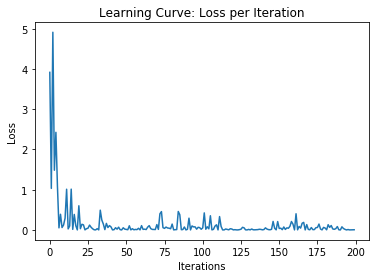

(array([-0.01097875, -0.05510883, -0.15029258,  0.0578843 ,  0.04930569,
         0.04966111, -0.08248716,  0.00468741,  0.13097538,  0.08305499]),
 0.15759246609044145)

In [97]:
train(newdata, batch_size = 1)

# Using SKLearn for regression

In [55]:
from sklearn.linear_model import LinearRegression

In [98]:
XX = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
yy = np.dot(XX, np.array([1, 2])) + 3
print(XX.shape, yy.shape)

(4, 2) (4,)


In [69]:
print(x_input.shape, target_input.shape)

(649, 10) (649,)


In [70]:
reg = LinearRegression().fit(x_input, target_input)

In [100]:
score = reg.score(x_input, target_input)
print("The R^2 score for the sklearn model is: ", score)

The R^2 score for the sklearn model is:  0.5239404805910177
